# Question D10

*Question*: Considering the ML-enabled system projects in which you participated, which project management frameworks were applied?

*Answer Type*: Multiple Option and Free Field

*Options*: [To the best of my knowledge none, CRISP-DM, Kanban, Lean, RUP/Open UP, SAFe, Scrum, Others please specify]

### Necessary Libraries

In [1]:
import pandas as pd
from utils.basic import rename_values, format_wordcloud_text
from utils.dataframe import DataframeUtils
from utils.plot import PlotUtils
from utils.bootstrapping import BootstrappingUtils

### Dataframe Init

In [2]:
dataframe_obj = DataframeUtils('./data/main_data.csv', ';', './data/unused_columns.txt', './data/formatted_columns.txt')
# the index is not important, but when we internally format df we need to reset index
dataframe_obj.df = dataframe_obj.df.reset_index(drop=True)

In [3]:
# question options
frameworks = {
    'D10_ML_Management_Framework_None': 'None',
    'D10_ML_Management_Framework_CRISP-DM': 'CRISP',
    'D10_ML_Management_Framework_Kanban': 'Kanban',
    'D10_ML_Management_Framework_Lean': 'Lean',
    'D10_ML_Management_Framework_RUP': 'RUP',
    'D10_ML_Management_Framework_SAFe': 'SAFe',
    'D10_ML_Management_Framework_Scrum': 'Scrum',
    'D10_ML_Management_Framework_Others': 'Others'
}

### Basic Analysis

In [4]:
dataframe_obj.df[['D10_ML_Management_Framework_None', 'D10_ML_Management_Framework_CRISP-DM', 'D10_ML_Management_Framework_Kanban',
         'D10_ML_Management_Framework_Lean','D10_ML_Management_Framework_RUP', 'D10_ML_Management_Framework_SAFe', 
         'D10_ML_Management_Framework_Scrum', 'D10_ML_Management_Framework_Others', 'D10_ML_Management_Framework_Others_Free']].head()

,D10_ML_Management_Framework_None,D10_ML_Management_Framework_CRISP-DM,D10_ML_Management_Framework_Kanban,D10_ML_Management_Framework_Lean,D10_ML_Management_Framework_RUP,D10_ML_Management_Framework_SAFe,D10_ML_Management_Framework_Scrum,D10_ML_Management_Framework_Others,D10_ML_Management_Framework_Others_Free
0,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,-99
1,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,not quoted,-99
2,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,-99
3,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,not quoted,-99
4,not quoted,not quoted,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,-99


In [5]:
indexes = []
values = []
for framework in frameworks:
    indexes.append(frameworks[framework])
    values.append(dataframe_obj.df[framework].value_counts()['quoted'])

In [6]:
# plot object
d10_plot = PlotUtils(pd.DataFrame(
    data={'Framework': indexes, 'Answers': values}
).sort_values(by=['Answers'], ascending=False))

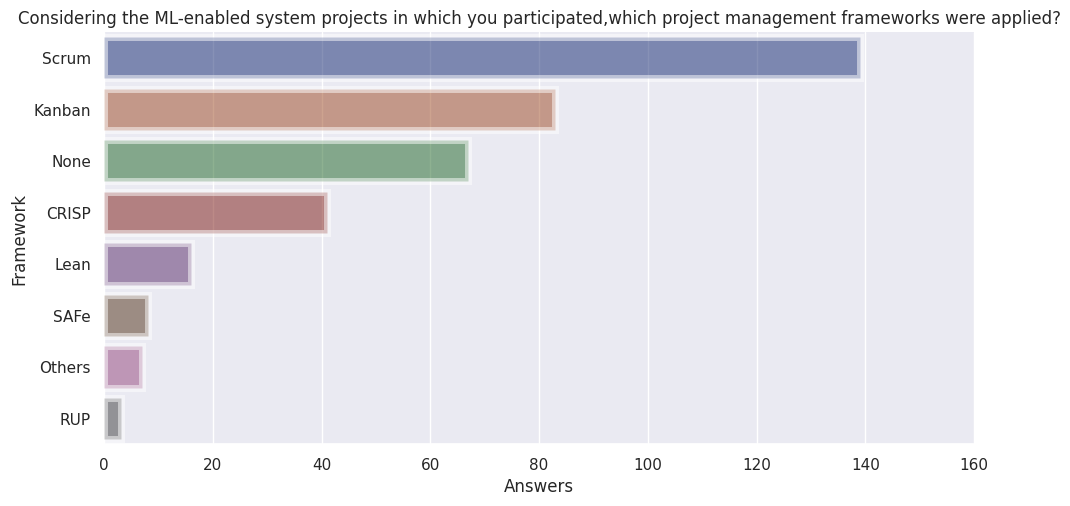

In [7]:
d10_plot.single_barplot(x_axis="Answers", y_axis="Framework",
                       title="Considering the ML-enabled system projects in which you participated,which project management frameworks were applied?",
                       x_label="Answers", y_label="Framework", x_label_rotation=0)

#### WordCloud

In [8]:
# remove unnecessary values
frameworks_free = list(filter(lambda a: str(a) != '-99', 
                           list(dataframe_obj.df['D10_ML_Management_Framework_Others_Free'])))
frameworks_free = list(filter(lambda a: str(a) != 'nan', frameworks_free))

In [9]:
frameworks_words = format_wordcloud_text(texts=frameworks_free, use_sep=False)

In [10]:
# plot object
d10_wc_plot = PlotUtils(pd.DataFrame(
    data={'Word': list(frameworks_words.keys()), 'Weight': list(frameworks_words.values())}
))

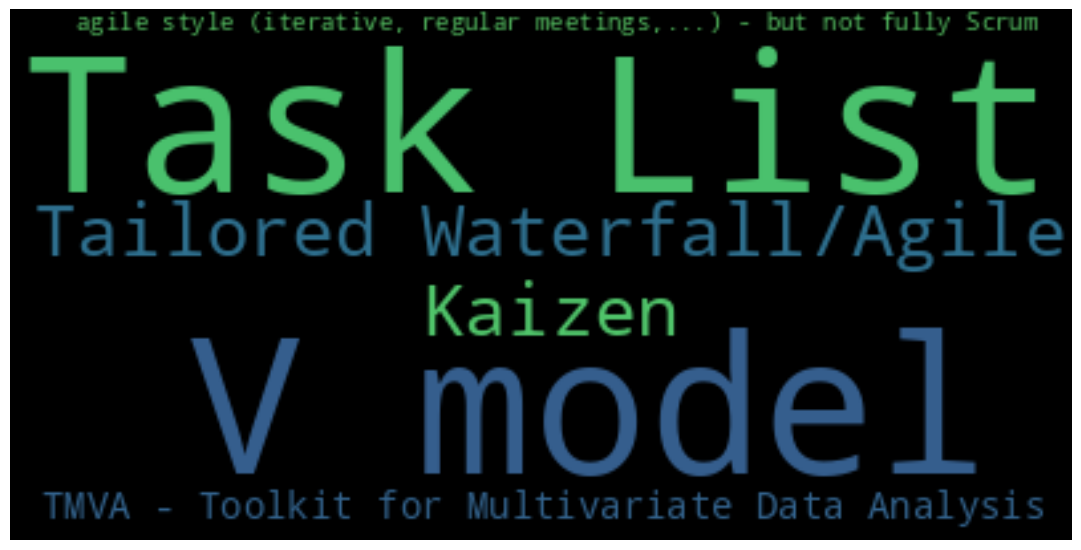

In [11]:
d10_wc_plot.wordcloud("Word", 'Weight')

### Bootstrapping Analysis

In [12]:
prefix = "D10_ML_Management_Framework_"

In [13]:
# the possible answers are the ones in columns
valid_options_list = [framework_column.split(prefix)[1] for framework_column in frameworks]

In [14]:
# answers could be composed by more than one option, so we will have an array of selected options
valid_answers_list = []
for idx, row in dataframe_obj.df.iterrows():
    answer = []
    for option in valid_options_list:
        if row[prefix + option] == 'quoted':
            answer.append(option)
    
    # if answer is empty, we assume that 'None' was assigned - in terms of meaning 'I don't know'
    if not answer:
        answer = ['None']
    valid_answers_list.append(answer)

In [15]:
bootstrapping_obj = BootstrappingUtils(valid_answers_list, valid_options_list, 1000, 1000, 0.95)

In [16]:
bootstrapped_dict_data = bootstrapping_obj.bootstrapping(question_type="multiple")

In [17]:
# get a pair of values between dict key and all the list values inside that key 
# key: [val_1, val_2] ---> [(key, val_1), (key, val_2)...]
indexes = []
values = []
for idx in bootstrapped_dict_data:
    indexes += [idx for _ in range(len(bootstrapped_dict_data[idx]['population']))]
    values += bootstrapped_dict_data[idx]['population']

In [18]:
# plot object for bootstrapped data
d10_boot_plot = PlotUtils(pd.DataFrame(
    data={'Framework': indexes, 'Value': values}
).sort_values(by=['Value'], ascending=False))

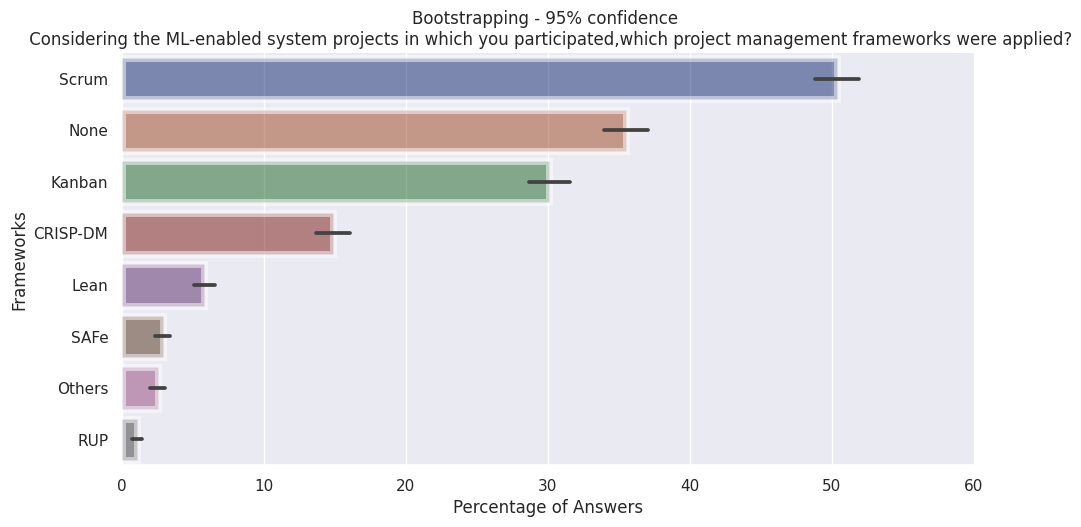

In [19]:
d10_boot_plot.single_barplot(x_axis="Value", y_axis="Framework", 
                       title="Bootstrapping - 95% confidence \n Considering the ML-enabled system projects in which you participated,which project management frameworks were applied?",
                       x_label="Percentage of Answers", y_label="Frameworks", x_label_rotation=0)

In [20]:
# confidence for each option
print("Option: (Lower Value, Mean, Upper Value)")
for idx in bootstrapped_dict_data:
    print(idx + ':' + str(bootstrapped_dict_data[idx]['confidence']))

Option: (Lower Value, Mean, Upper Value)
None:(35.465033063071495, 35.5111, 35.5571669369285)
CRISP-DM:(14.85791491040532, 14.8941, 14.93028508959468)
Kanban:(30.079366387160732, 30.1231, 30.16683361283927)
Lean:(5.800657072002579, 5.8226, 5.844542927997422)
RUP:(1.0727657260153014, 1.0828, 1.0928342739846986)
SAFe:(2.891752708199353, 2.9077, 2.9236472918006475)
Scrum:(50.29875021228948, 50.3446, 50.39044978771052)
Others:(2.5220059231800347, 2.5373, 2.5525940768199655)
